In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
X_train = pd.read_csv('./train.tsv', sep='\t', header=0)
X_test = pd.read_csv('./test.tsv', sep='\t', header=0)

In [3]:
y_train = X_train.label
X_train = X_train.drop(['label', 'id'], axis=1)
y_test = X_test.label
X_test = X_test.drop(['label', 'id'], axis=1)

## Scenario 1
true vs all

In [4]:
y_test_1 = y_test.copy()
y_test_1[y_test_1 != 'true'] = 'false'
y_train_1 = y_train.copy()
y_train_1[y_train_1 != 'true'] = 'false'

In [5]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.statement)
count_test = count_vectorizer.transform(X_test.statement)

## Create function for creating confusion matrix

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

## Training and testing scenario 1

In [7]:
clf_1 = RandomForestClassifier()

accuracy:   0.826
Confusion matrix, without normalization


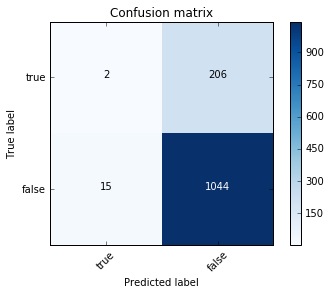

In [8]:
clf_1.fit(count_train, y_train_1)
pred = clf_1.predict(count_test)
score = metrics.accuracy_score(y_test_1, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test_1, pred, labels=['true', 'false'])
plot_confusion_matrix(cm, classes=['true', 'false']) 

## Scenario 2
(true + mostly true + half true) vs all

In [9]:
true_label = ['true', 'mostly-true', 'half-true']

y_test_2 = y_test.copy()
for i in range(y_test_2.shape[0]):
    if y_test_2[i] in true_label:
        y_test_2[i] = 'true'
    else:
        y_test_2[i] = 'false'

y_train_2 = y_train.copy()
for i in range(y_train_2.shape[0]):
    if y_train_2[i] in true_label:
        y_train_2[i] = 'true'
    else:
        y_train_2[i] = 'false'

## Training and Testing scenario 2

In [10]:
clf_2 = RandomForestClassifier()

accuracy:   0.597
Confusion matrix, without normalization


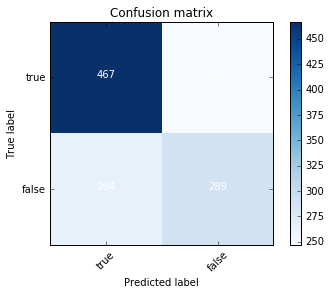

In [11]:
clf_2.fit(count_train, y_train_2)
pred = clf_2.predict(count_test)
score = metrics.accuracy_score(y_test_2, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test_2, pred, labels=['true', 'false'])
plot_confusion_matrix(cm, classes=['true', 'false']) 